Charger les 2 fichiers CSV inventaires dans des dataframes pandas.

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [7]:
DATA_DIR = Path("../../data")
INPUT_DIR = Path(DATA_DIR, "portfolio-inventories")
OUTPUT_DIR = Path(DATA_DIR, "output")

In [8]:
PORTFOLIO_CODE = "Portoflio Code"
ASSET_CODE = "Asset Code"
QUANTITY = "Quantity"
VARIATION = "Variation"

In [9]:
COLS = [PORTFOLIO_CODE, ASSET_CODE, QUANTITY]

In [10]:
portfolio_d1_df = pd.read_csv(
    Path(INPUT_DIR, "day1.ptf_inventories.csv"),
    sep=";",
    # usecols=COLS,
)

portfolio_d2_df = pd.read_csv(
    Path(INPUT_DIR, "day2.ptf_inventories.csv"),
    sep=";",
    # usecols=COLS,
)


In [11]:
portfolio_d1_df = portfolio_d1_df[COLS]
portfolio_d2_df = portfolio_d2_df[COLS]

In [12]:
pd.set_option("display.max_columns", None)
display(portfolio_d1_df.head())
display(portfolio_d2_df.head())

,Portoflio Code,Asset Code,Quantity
0,111111,frw01G8,7.247088e+04
1,111111,frw01UH,1.272192e+06
2,111111,frw01VY,5.294401e+04
3,111111,frw01WK,2.101907e+06
4,111111,frw01XE,4.907177e+05


,Portoflio Code,Asset Code,Quantity
0,111111,frw01G8,7.247088e+04
1,111111,frw01UH,1.272192e+06
2,111111,frw01VY,5.294401e+04
3,111111,frw01WK,2.101907e+06
4,111111,frw01ZR,5.972627e+04


Explorer ces fichiers pour essayer d'en comprendre la structure.

Déterminer s'il y a des lignes en "doublon".

In [13]:
duplicated_data_mask = portfolio_d1_df.duplicated(
    [PORTFOLIO_CODE, ASSET_CODE],
    keep=False
)

In [14]:
portfolio_d1_df[duplicated_data_mask]

,Portoflio Code,Asset Code,Quantity
47,111111,FutUCO22412,31.609809
62,111111,FutBCO22412,-2.370736
69,111111,FutBCO22412,11.063433
70,111111,FutUCO22412,42.673242
274,111111,ISINS7620S9Y,303.454162
275,111111,ISINS7620S9Y,1296.792395
371,111111,ISIN01Q91500,2245.876896
372,111111,ISIN01Q91500,6513.991291
597,222222,FutBCO22412,-1.580490
602,222222,FutPIN22412,2.370736


Agréger les lignes multiples associées à un même couple (portfolio, asset), en utilisant une fonction d'agrégation pertinente.

In [15]:
aggregated_d1_df = portfolio_d1_df.groupby(
    [PORTFOLIO_CODE, ASSET_CODE]
).sum(
).reset_index()

aggregated_d2_df = portfolio_d2_df.groupby(
    [PORTFOLIO_CODE, ASSET_CODE]
).sum(
).reset_index()

In [16]:
aggregated_d1_df.head()

,Portoflio Code,Asset Code,Quantity
0,111111,CashAUD,95178.18449
1,111111,CashCAD,14870.54203
2,111111,CashCHF,34195.61730
3,111111,CashDKK,87008.76382
4,111111,CashEUR,181067.57390


In [17]:
aggregated_d2_df.head()

,Portoflio Code,Asset Code,Quantity
0,111111,CashAUD,95178.18449
1,111111,CashCAD,14870.54203
2,111111,CashCHF,34195.61730
3,111111,CashDKK,87008.76382
4,111111,CashEUR,181067.57390


Ecrire un petit script permettant de calculer les variations de chaque asset de chaque portfolio, dès lors qu'il y a eu une variation non nulle. Stocker les résultats dans un dataframe.

In [18]:
merged_df = aggregated_d1_df.merge(
    aggregated_d2_df,
    how="outer",
    on=[PORTFOLIO_CODE, ASSET_CODE],
    suffixes=("_before", "_after"),
).fillna(0)

In [19]:
merged_df[VARIATION] = merged_df["Quantity_after"] - merged_df["Quantity_before"]

In [20]:
merged_df

,Portoflio Code,Asset Code,Quantity_before,Quantity_after,Variation
0,111111,CashAUD,95178.18449,95178.184490,0.000000
1,111111,CashCAD,14870.54203,14870.542030,0.000000
2,111111,CashCHF,34195.61730,34195.617300,0.000000
3,111111,CashDKK,87008.76382,87008.763820,0.000000
4,111111,CashEUR,181067.57390,181067.573900,0.000000
...,...,...,...,...,...
1166,222222,ISINBW391400,0.00000,13.434169,13.434169
1167,222222,ISINKL231400,0.00000,79024.521310,79024.521310
1168,222222,ISINKXW41400,0.00000,150146.590500,150146.590500
1169,222222,ISINL1E01400,0.00000,158049.042600,158049.042600


In [21]:
variation_df = merged_df[merged_df[VARIATION] != 0][[PORTFOLIO_CODE, ASSET_CODE, VARIATION]]

In [22]:
variation_df.head()

,Portoflio Code,Asset Code,Variation
63,111111,ISIN01759635,-79024.52131
81,111111,ISIN07750454,-102731.87770
253,111111,ISIN15500561,-118536.78200
282,111111,ISIN21809015,-158049.04260
307,111111,ISIN38050809,-102731.87770


Exporter le dataframe des variations au format CSV.

In [23]:
variation_df.to_csv(Path(OUTPUT_DIR, "variation.csv"), index=False)

### Compléments

Enregistrer le résultat dans un fichier Excel templaté.

In [24]:
from datetime import datetime
from shutil import copyfile

from openpyxl import load_workbook

In [25]:
template_path = Path(DATA_DIR, "templates", "variation_template.xlsx")

today = datetime.today().strftime("%Y-%m-%d")
output_file_path = Path(OUTPUT_DIR, f"filled_template_variations_{today}.xlsx")

output_file_path.parent.mkdir(parents=True, exist_ok=True)
copyfile(template_path, output_file_path)

wb = load_workbook(output_file_path)

with pd.ExcelWriter(
    output_file_path,
    engine="openpyxl",
    mode="a",
    if_sheet_exists="overlay",
) as writer:

    variation_df.to_excel(
        writer,
        sheet_name="Data",
        startrow=1,
        index=False,
        header=False,
    )  

Mettre en forme un nouveau fichier Excel dans le code.

In [26]:
from openpyxl.styles import Font

In [27]:
today = datetime.today().strftime("%Y-%m-%d")
output_file = Path(OUTPUT_DIR, f"red_header_variations_{today}.xlsx")

with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
    variation_df.to_excel(
        writer,
        sheet_name="Data",
        startrow=0,
        startcol=0,
        index=False,
)

    wb = writer.book
    ws = writer.sheets["Data"]

    red_bold = Font(bold=True, color="FF0000")

    for cell in ws[1]:
        cell.font = red_bold

### Visualisations

Visualiser la distribution des variations non nulles.

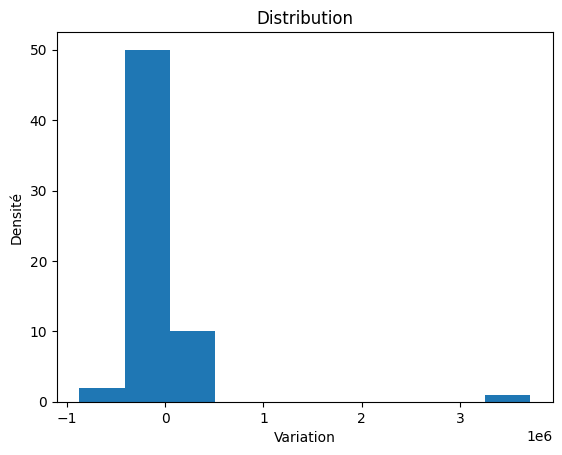

In [28]:
plt.hist(variation_df[VARIATION])
plt.title("Distribution")
plt.xlabel(VARIATION)
plt.ylabel("Densité")
plt.show()

Visualiser la composition du portefeuille 111111.

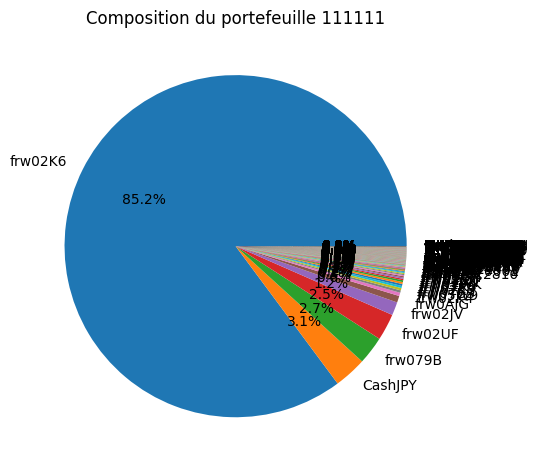

In [33]:
pie_mask = (
    (aggregated_d1_df[PORTFOLIO_CODE] == 111111)
    &
    (aggregated_d1_df[QUANTITY] > 0)
)

pie_df = aggregated_d1_df[pie_mask].sort_values(QUANTITY, ascending=False)

plt.figure()
plt.pie(
    pie_df[QUANTITY],
    labels=pie_df[ASSET_CODE],
    autopct="%1.1f%%",
)
plt.title("Composition du portefeuille 111111")
plt.tight_layout()
plt.show()

Regrouper les assets représentant moins de 2% dans une catégorie "others".

In [41]:
asset_total = pie_df[QUANTITY].sum()
threshold = 0.02 * asset_total
major_assets = pie_df[pie_df[QUANTITY] >= threshold]
minor_assets = pie_df[pie_df[QUANTITY] < threshold]

label_list = major_assets[ASSET_CODE].tolist()
value_list = major_assets[QUANTITY].tolist()
if not minor_assets.empty:
    label_list.append("Others")
    value_list.append(minor_assets[QUANTITY].sum())

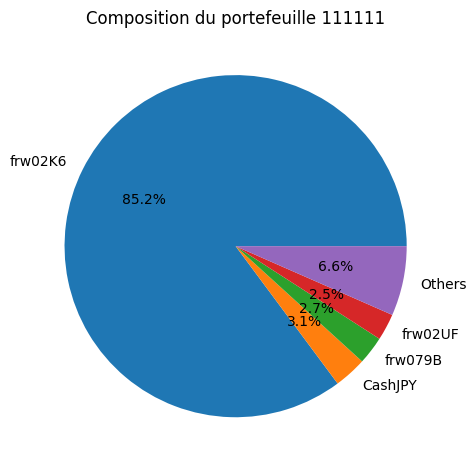

In [43]:
plt.figure()
plt.pie(
    value_list,
    labels=label_list,
    autopct='%1.1f%%',
)
plt.title("Composition du portefeuille 111111")
plt.tight_layout()
plt.show()

S'il n'y en a pas, rajouter des bordures entre les quartiers du camembert. Exporter le graphique dans un fichier image.

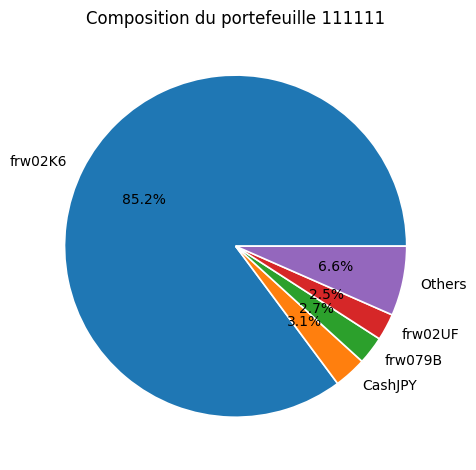

In [46]:
plt.figure()
plt.pie(
    value_list,
    labels=label_list,
    autopct='%1.1f%%',
    wedgeprops={
        "linewidth": 1.2,
        "edgecolor": "white",
    } 
)
plt.title("Composition du portefeuille 111111")
plt.tight_layout()
plt.savefig(
    Path(OUTPUT_DIR, "portfolio_111111.png"),
    dpi=100,
)
plt.show()
